# K-means clustering

1. K-means clustering is a popular unsupervised machine learning algorithm that divides a set of data points into k distinct clusters based on their features.
- Initialization: Choose k initial centroids randomly from the data points.
- Assignment Step: Assign each data point to the closest centroid, forming k clusters.
- Update Step: Calculate the new centroids by taking the mean of all points assigned to each cluster.
- Iterative Optimization: Repeat the assignment and update steps until the centroids no longer change significantly.
- Convergence: The algorithm converges when the assignments no longer change or the change is below a certain threshold.
- Evaluation: Assess the quality of the clustering, often using metrics like within-cluster sum of squares (WCSS).
- Choosing k: Select the number of clusters using methods like the elbow method, which involves plotting WCSS against the number of clusters and looking for an 'elbow' point.
- Scalability: K-means can struggle with large datasets or high numbers of dimensions; methods like k-means++ can help with efficient centroid initialization.
- Sensitivity to Initialization: The initial choice of centroids can affect the final outcome; multiple runs with different initializations can improve results.
- Limitations: K-means assumes spherical clusters and is sensitive to outliers; variations like k-medoids or DBSCAN may be more appropriate for different data distributions.

# Color quantization!

In [66]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [67]:
img = cv2.imread("images/BSE_Image.jpg")
img.shape

(751, 1000, 3)

In [68]:
# Convert MxNx3 image into Kx3 where K=MxN
img2 = img.reshape((-1,3))  #-1 reshape means, in this case MxN
img2.shape

(751000, 3)

In [69]:
#We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV
img2 = np.float32(img2)

In [70]:
#Define criteria, number of clusters and apply k-means
#When this criterion is satisfied, the algorithm iteration stops. 
#cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.
#cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.
#cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.
#Max iterations, in this example 10. 
#Epsilon, required accuracy, in this example 1.0
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [71]:
# Number of clusters
k = 4 # change to 3 to check this works!

In [72]:
# Number of attempts, number of times algorithm is executed using different initial labelings.
#Algorithm return labels that yield best compactness.
#compactness : It is the sum of squared distance from each point to their corresponding centers.

attempts = 10

In [73]:
#other flags needed as inputs for K-means
#Specify how initial seeds are taken.
#Two options, cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS

ret,label,center=cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)

## Let's check the 4 centers found (I expect 3 dimension!)

 in k-means clustering, each cluster has a center, often referred to as the centroid. The centroid is a point in the feature space that represents the mean position of all the points 

In [74]:
center

array([[151, 151, 151],
       [ 47,  47,  47],
       [251, 251, 251]], dtype=uint8)

In [75]:
center.shape

(3, 3)

# Let's check the labels!

In [76]:
label.shape

(751000, 1)

In [77]:
label.flatten().shape

(751000,)

Indexing with Flattened Labels: 
- When you perform center[label.flatten()], you are effectively using each value in the label array as an index to select a row from the center array. This operation maps each pixel to its cluster's centroid.
- For example, if a pixel has a label 2, center[2] is accessed, which is the third row in the center array, representing the centroid of cluster 2.


This operation is done for all pixels, so you end up with a matrix where each row corresponds to the centroid values for a pixel in the image.

In [78]:
#Next, we have to access the labels to regenerate the clustered image
res = center[label.flatten()]
res2 = res.reshape((img.shape)) #Reshape labels to the size of original image

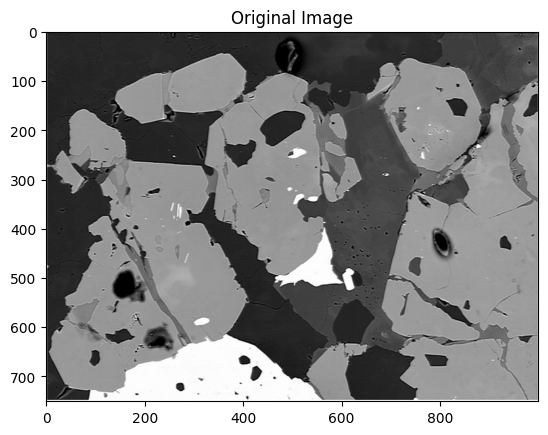

In [82]:
#Now let us visualize the output result
plt.imshow(img)
plt.title('Original Image')
plt.show()

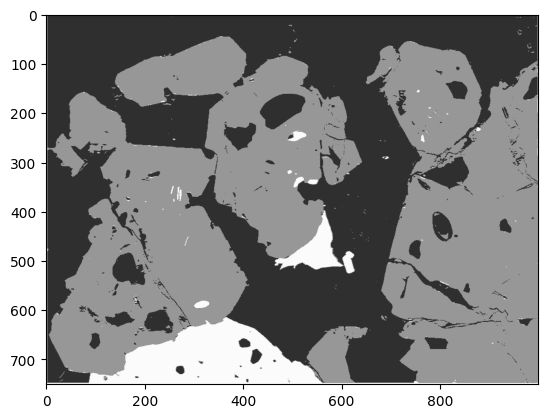

In [80]:
res2 = res2.astype('uint8')
plt.imshow(res2)
plt.show()

In [83]:
res2.shape

(751, 1000, 3)

# Gaussian Mixture Model (GMM)

Differently from before, there cases when the clusters overlaps, and so is not possible to perform the segmentation using K-means

With a Gaussian Mixture Model i'm saying the histogram of the image is a combination of gaussian scaled with different ratiosm (each has some weight and height and is centered around a point!)

A Gaussian Mixture Model (GMM) is a probabilistic model (Still unsupervised)that assumes data points are generated from a mixture of several Gaussian distributions. It's used in clustering by modeling each cluster with a Gaussian, providing not just cluster assignments but also probabilities of membership. GMM parameters are estimated using the Expectation-Maximization algorithm, which iteratively improves cluster assignments and parameter estimates. GMMs can model complex data distributions better than simpler methods like k-means, accommodating clusters of different sizes and shapes. However, they require pre-specifying the number of clusters and can be sensitive to initial settings and high-dimensional data.

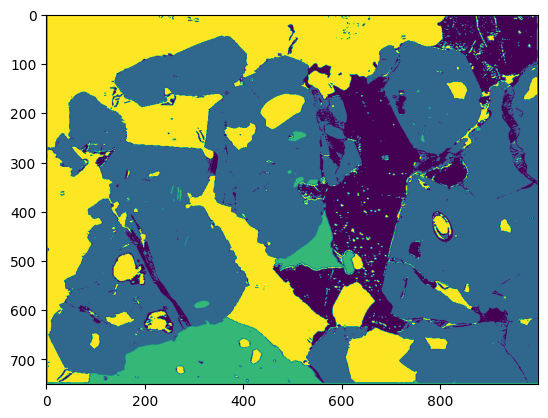

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("images/BSE_Image.jpg")

# Convert MxNx3 image into Kx3 where K=MxN
img2 = img.reshape((-1,3))  #-1 reshape means, in this case MxN

from sklearn.mixture import GaussianMixture as GMM

#covariance choices, full, tied, diag, spherical
gmm_model = GMM(n_components=4, covariance_type='tied').fit(img2)  #tied works better than full
gmm_labels = gmm_model.predict(img2)

#Put numbers back to original shape so we can reconstruct segmented image
original_shape = img.shape
segmented = gmm_labels.reshape(original_shape[0], original_shape[1])
plt.imshow(segmented)
plt.show()

Sometimes is not clear the number of clusters to use! So...

# BIC

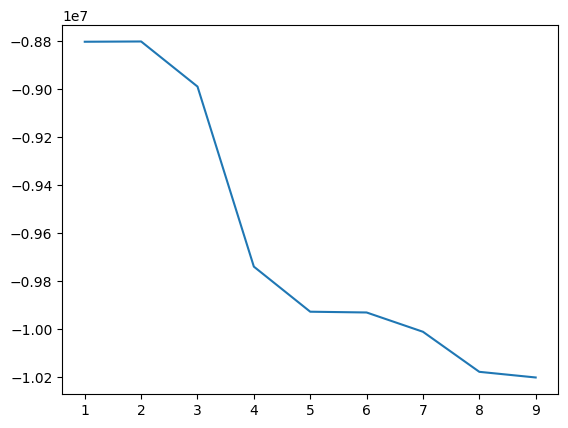

In [4]:
n_components = np.arange(1,10)
gmm_models = [GMM(n, covariance_type='tied').fit(img2) for n in n_components]
plt.plot(n_components, [m.bic(img2) for m in gmm_models], label='BIC')

# AIC

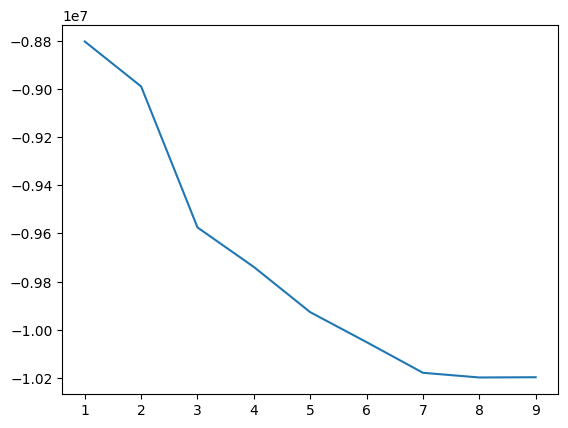

In [6]:
n_components = np.arange(1,10)
gmm_models = [GMM(n, covariance_type='tied').fit(img2) for n in n_components]
plt.plot(n_components, [m.aic(img2) for m in gmm_models], label='AIC')

What are features in machine learning?
- Basically if i consider an image, the pixel intensity can be  considerated as a feature;
- Now if i consider a feature vector,  the pixels got from different transformations can be seen as such!

Think about the feature inputs as a sequence of outputs from different filters;
the features vector can be the sequence of values for a given point for a segmentation task!

Basically, if i already know which is the right combinaation of our features able to discern  for the given task, there is not need for machine learning! eg. just use the filters to evidence them!

- Which is the right approach? ML vs DL
- ML is better when few data (not thousands of labelled data)

Still to extract the right features we need domani knowledge!

Let's make some examples of using the right filters to extract good features (using domain knowledge)

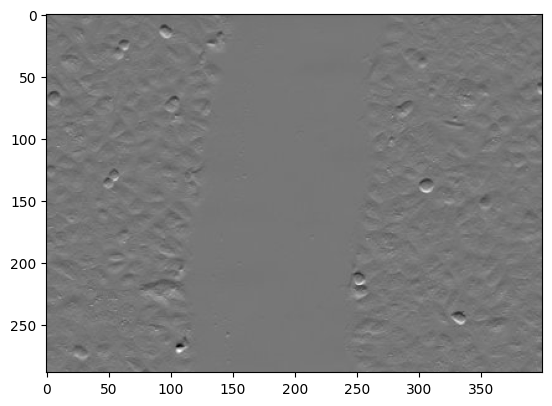

In [6]:
import cv2
from skimage.filters.rank import entropy
from skimage.morphology import disk
import pandas as pd
import matplotlib.pyplot as plt

img = cv2.imread('./images/scratch.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap=plt.cm.gray)
plt.show()

The entropy filter is a technique in image processing used to distinguish between smooth and rough textures by analyzing the complexity within a pixel's neighborhood. For smooth regions with uniform pixel intensities, the entropy is low, indicating minimal variation. In contrast, rough areas exhibit high entropy due to significant intensity variation, signaling complex textures. This method is instrumental in applications like image segmentation and texture analysis, enabling the differentiation of image regions based on their texture characteristics.

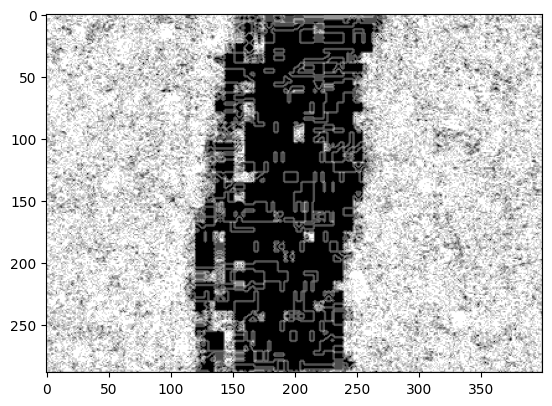

In [7]:
entropy_img = entropy(img, disk(1))
entropy1 = entropy_img.reshape(img.shape[0],img.shape[1])
plt.imshow(entropy1,cmap=plt.cm.gray)
plt.show()

# How to prepare a feature vector?
- Creating a dataframe, where each row is an individual feacture vector for a given pixel
- then it's possible to pass it to a ML alg

In [3]:
import cv2
from skimage.filters.rank import entropy
from skimage.morphology import disk
import pandas as pd
from scipy import ndimage as nd

img = cv2.imread('./images/scratch.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = img.reshape(-1)


# -------------------------------------------
## Creating the dataframe
df = pd.DataFrame()
df['Original Image'] = img2
# -------------------------------------------
entropy_img = entropy(img, disk(1))
entropy1 = entropy_img.reshape(-1)
df['Entropy'] = entropy1

gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1


from skimage.filters import sobel
sobel_img = sobel(img)

sobel1 = sobel_img.reshape(-1)
df['Sobel'] = sobel1
print(df.head())

   Original Image   Entropy  Gaussian s3     Sobel
0             105  1.584963          114  0.027240
1             118  2.000000          115  0.056183
2             129  1.500000          116  0.041917
3             129  1.500000          117  0.009249
4             126  1.500000          118  0.013335


# Gabor filter

For image processing and computer vision, Gabor filters are generally 
used in texture analysis, edge detection, feature extraction, etc. 
Gabor filters are special classes of bandpass filters, i.e., they allow a certain 
‘band’ of frequencies and reject the others.

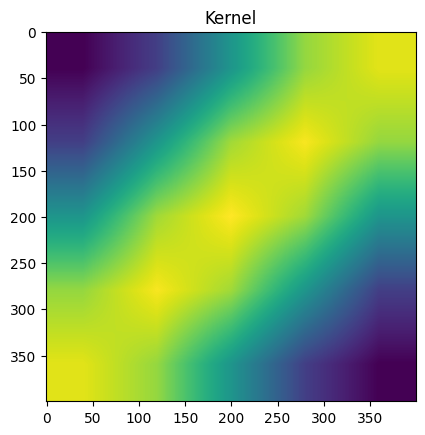

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

ksize = 5  #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 3 #Large sigma on small features will fully miss the features. 
theta = 1*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
lamda = 1*np.pi /4  #1/4 works best for angled. 
gamma=0.4  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 0  #Phase offset. I leave it to 0. 


kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)


img = cv2.imread('./images/synthetic.jpg')
#img = cv2.imread('BSE_Image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)

kernel_resized = cv2.resize(kernel, (400, 400))                    # Resize image
plt.imshow(kernel_resized)
plt.title("Kernel")
plt.show()


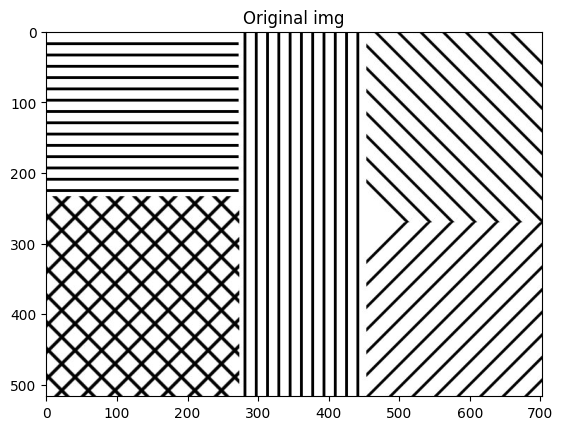

In [5]:
plt.imshow(img,cmap=plt.cm.gray)
plt.title("Original img")
plt.show()

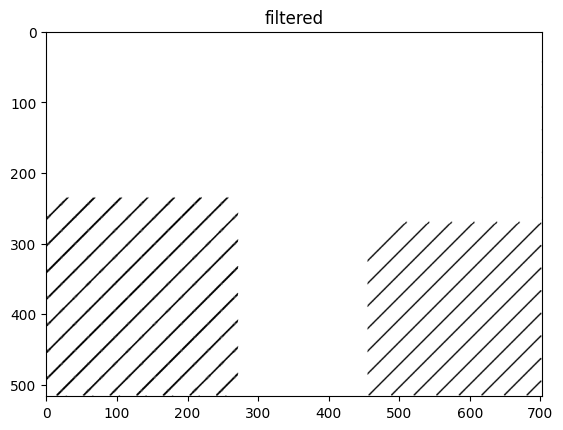

In [6]:
plt.imshow(fimg,cmap=plt.cm.gray)
plt.title("filtered")
plt.show()

# Let's now train a ML model (Random Forest) for segmentation!

Some Remarks:
- ML is used when is not possible to have thousand of traning samples

Here the approach is to use only one image for thre training!
Basically i have one only segmented image!
Therefore, i flatten it and i get pixels with their gt.

Traning:
- i extract different features using different filters and then flatten each new image, storing in the same dataset!
- Basically, each row is a feature vector for a given pixel.

## What if i have more training images?
- i can just concatenate the images! adding more pixels in the dataframe!

In [2]:
import numpy as np
import cv2
import pandas as pd

In [4]:
img = cv2.imread('images/Train_images/Sandstone_Versa0000.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
img2 = img.reshape(-1)

In [5]:
## adding the first column!
df = pd.DataFrame()
df['Original Image'] = img2

In [6]:
#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
            
                
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

## Adding more features!

In [7]:
#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe

from skimage.filters import roberts, sobel, scharr, prewitt

#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=3)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe


# Now i need to add the column for the label!

In [10]:
#Now, add a column in the data frame for the Labels
#For this, we need to import the labeled image
labeled_img = cv2.imread('images/Train_masks/Sandstone_Versa0000.tif')
#Remember that you can load an image with partial labels 
#But, drop the rows with unlabeled data

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
labeled_img1 = labeled_img.reshape(-1)
df['Labels'] = labeled_img1

df.head()

,Original Image,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Canny Edge,Roberts,Sobel,Scharr,Prewitt,Gaussian s3,Gaussian s7,Median s3,Variance s3,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,29
1,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,29
2,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,29
3,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,29
4,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,29


In [11]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["Labels"].values

#Define the independent variables
X = df.drop(labels = ["Labels"], axis=1) 

#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)

In [14]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with n number of decision trees
model = RandomForestClassifier(n_estimators = 10, random_state = 42)

In [15]:
# Train the model on training data
model.fit(X_train, y_train)

prediction_test_train = model.predict(X_train)

#Test prediction on testing data. 
prediction_test = model.predict(X_test)

In [17]:
prediction_prob_test = model.predict_proba(X_test)
prediction_prob_test

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [18]:
from sklearn import metrics
#Print the prediction accuracy

#First check the accuracy on training data. This will be higher than test data prediction accuracy.
print ("Accuracy on training data = ", metrics.accuracy_score(y_train, prediction_test_train))
#Check accuracy on test dataset. If this is too low compared to train it indicates overfitting on training data.
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))


Accuracy on training data =  0.998774393651686
Accuracy =  0.981383069991813


# Feature Importances!

In [19]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Gabor4            0.247400
Gaussian s3       0.173747
Median s3         0.111051
Original Image    0.094914
Gabor8            0.086771
Gabor11           0.076892
Gabor3            0.070584
Gabor7            0.019360
Gabor6            0.016709
Gabor22           0.016406
Gaussian s7       0.016078
Prewitt           0.009944
Sobel             0.008948
Gabor21           0.006858
Gabor23           0.006546
Gabor24           0.006456
Scharr            0.006024
Gabor5            0.005156
Roberts           0.004825
Variance s3       0.002981
Gabor31           0.002690
Gabor32           0.002642
Gabor29           0.002559
Gabor30           0.002400
Gabor12           0.001134
Canny Edge        0.000910
Gabor20           0.000011
Gabor28           0.000002
Gabor27           0.000002
Gabor15           0.000000
Gabor26           0.000000
Gabor25           0.000000
Gabor13           0.000000
Gabor1            0.000000
Gabor19           0.000000
Gabor18           0.000000
Gabor17           0.000000
G

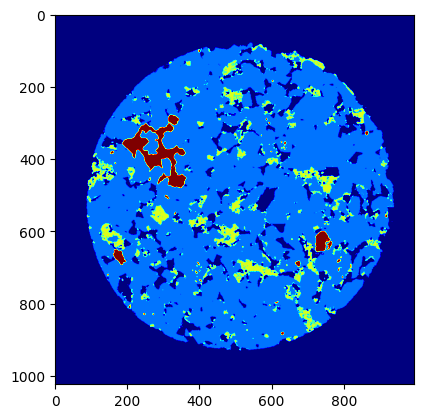

In [20]:
import pickle

#Save the trained model as pickle string to disk for future use
filename = "sandstone_model"
pickle.dump(model, open(filename, 'wb'))

#To test the model on future datasets
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X)

segmented = result.reshape((img.shape))

from matplotlib import pyplot as plt
plt.imshow(segmented, cmap ='jet')

# Let's do the same but testing on more images!

In [21]:

import numpy as np
import cv2
import pandas as pd
 
def feature_extraction(img):
    df = pd.DataFrame()


#All features generated must match the way features are generated for TRAINING.
#Feature1 is our original image pixels
    img2 = img.reshape(-1)
    df['Original Image'] = img2

#Generate Gabor features
    num = 1
    kernels = []
    for theta in range(2):
        theta = theta / 4. * np.pi
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi / 4):
                for gamma in (0.05, 0.5):
#               print(theta, sigma, , lamda, frequency)
                
                    gabor_label = 'Gabor' + str(num)
#                    print(gabor_label)
                    ksize=9
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    #Now filter image and add values to new column
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  #Modify this to add new column for each gabor
                    num += 1
########################################
#Geerate OTHER FEATURES and add them to the data frame
#Feature 3 is canny edge
    edges = cv2.Canny(img, 100,200)   #Image, min and max values
    edges1 = edges.reshape(-1)
    df['Canny Edge'] = edges1 #Add column to original dataframe

    from skimage.filters import roberts, sobel, scharr, prewitt

#Feature 4 is Roberts edge
    edge_roberts = roberts(img)
    edge_roberts1 = edge_roberts.reshape(-1)
    df['Roberts'] = edge_roberts1

#Feature 5 is Sobel
    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1

#Feature 6 is Scharr
    edge_scharr = scharr(img)
    edge_scharr1 = edge_scharr.reshape(-1)
    df['Scharr'] = edge_scharr1

    #Feature 7 is Prewitt
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1

    #Feature 8 is Gaussian with sigma=3
    from scipy import ndimage as nd
    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s3'] = gaussian_img1

    #Feature 9 is Gaussian with sigma=7
    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian s7'] = gaussian_img3

    #Feature 10 is Median with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1

    #Feature 11 is Variance with size=3
    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    df['Variance s3'] = variance_img1  #Add column to original dataframe


    return df

In [25]:
import glob
import pickle
from matplotlib import pyplot as plt

filename = "sandstone_model"
loaded_model = pickle.load(open(filename, 'rb'))

path = "images/Train_images/*.tif"
for file in glob.glob(path):
    print(file)     #just stop here to see all file names printed
    img1= cv2.imread(file)
    img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

#Call the feature extraction function.
    X = feature_extraction(img)
    result = loaded_model.predict(X)
    segmented = result.reshape((img.shape))
    
    name = file.split("e_")
    plt.imsave('images/Segmented/'+ name[1]+".tif", segmented, cmap='jet', format='TIFF')


images/Train_images/Sandstone_Versa0150.tif
images/Train_images/Sandstone_Versa0350.tif
images/Train_images/Sandstone_Versa0250.tif
images/Train_images/Sandstone_Versa0050.tif
images/Train_images/Sandstone_Versa0100.tif
images/Train_images/Sandstone_Versa0300.tif
images/Train_images/Sandstone_Versa0400.tif
images/Train_images/Sandstone_Versa0200.tif
images/Train_images/Sandstone_Versa0000.tif
